# Predicting Heart Disease using Machine Learning 

**Objective:** Given clinical parameters about a patient, build a predictive model that can predict whether a patient has heart disease or not.

### Data Source

* Kaggle: https://www.kaggle.com/ronitf/heart-disease-uci
* UCI Machine Learning repository: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

### Data Dictionary

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
        0: Typical angina: chest pain related decrease blood supply to the heart
        1: Atypical angina: chest pain not related to heart
        2: Non-anginal pain: typically esophageal spasms (non heart related)
        3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    - anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    - serum = LDL + HDL + .2 * triglycerides 
    - above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    - '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
        0: Nothing to note
        1: ST-T Wave abnormality
            can range from mild symptoms to severe problems
            signals non-normal heart beat
        2: Possible or definite left ventricular hypertrophy
            Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
    - looks at stress of heart during excercise
    - unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
        0: Upsloping: better heart rate with excercise (uncommon)
        1: Flatsloping: minimal change (typical healthy heart)
        2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    - colored vessel means the doctor can see the blood passing through
    - the more blood movement the better (no clots)
13. thal - thalium stress result
        1,3: normal
        6: fixed defect: used to be defect but ok now
        7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [1]:
# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Scikit-Learn ML models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Model Evaluation tools
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

# Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

## Data

In [2]:
# Data
data_p = pd.read_csv('heart-disease.csv')

In [3]:
data_p.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## EDA

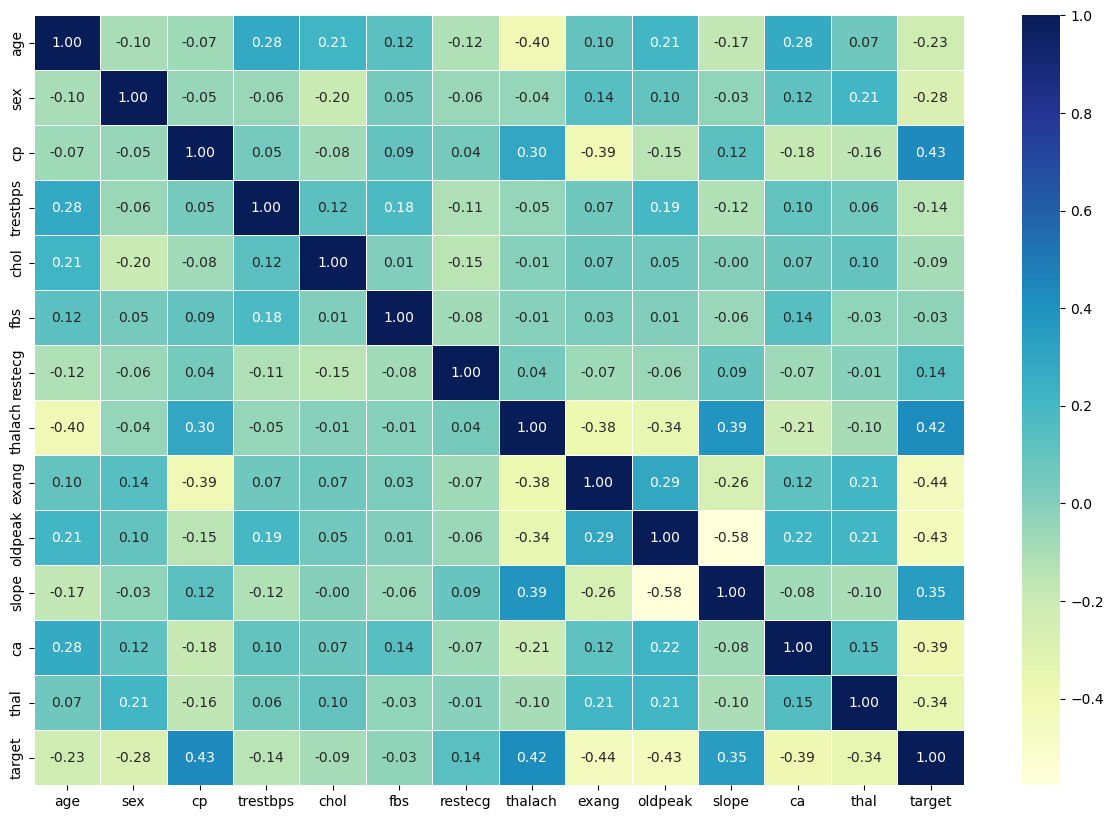

In [5]:
# Visualizing the correlation matrix
corr_matrix = data_p.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap='YlGnBu');

In [6]:
type(data_p.corr())

pandas.core.frame.DataFrame

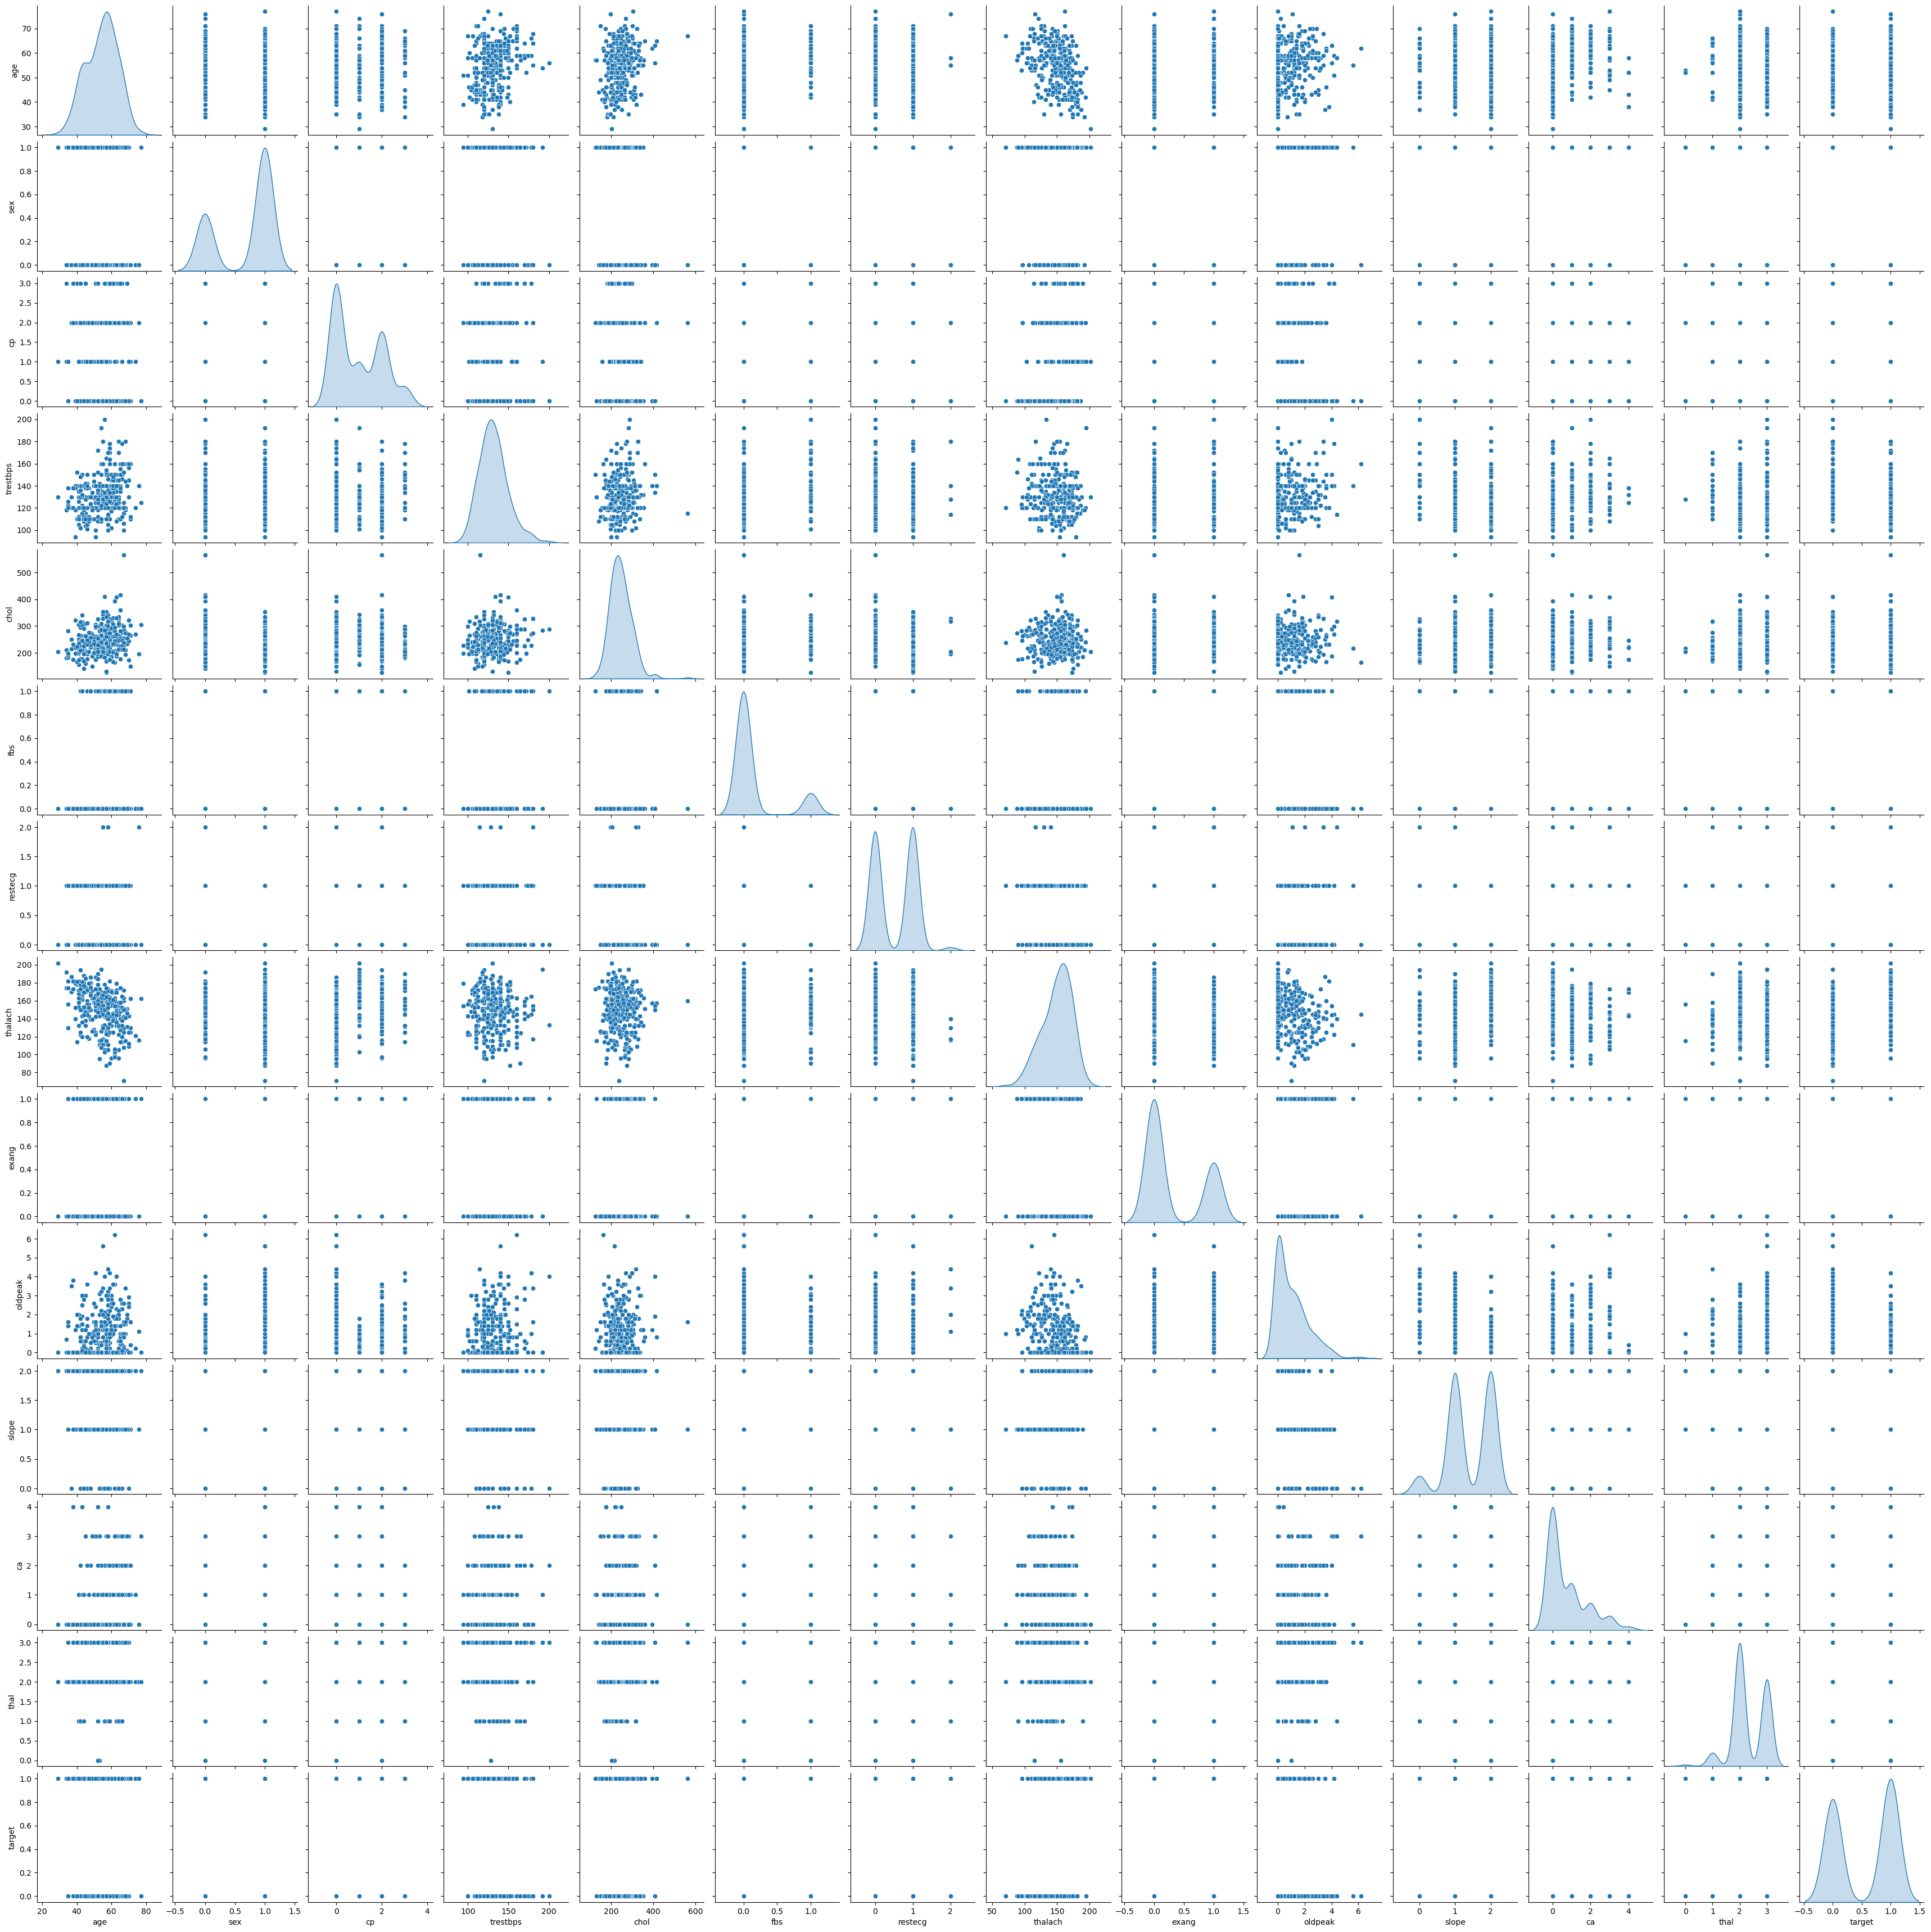

In [7]:
# Bivariate analysis
sns.pairplot(data_p, diag_kind='kde')

Number of Positive cases: 165. Percentage = 54.45544554455446
Number of Negative cases: 138. Percentage = 45.54455445544555


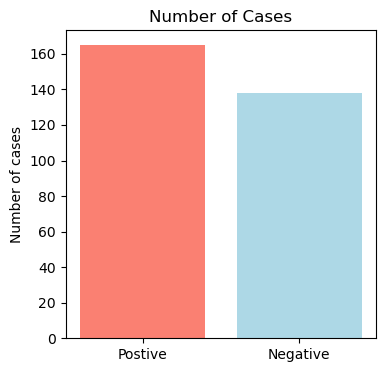

In [8]:
# Calculate heart disease ratio from true/false of outcome variable
n_true = len(data_p.loc[data_p['target'] == True])
n_false = len(data_p.loc[data_p['target'] == False ])
print("Number of Positive cases: {0}. Percentage = {1}".format(n_true, n_true/(n_true + n_false) * 100))
print("Number of Negative cases: {0}. Percentage = {1}".format(n_false, n_false/(n_true + n_false) * 100))

# Visualization
dic_1 = {"Postive": n_true, "Negative": n_false}
fig, ax = plt.subplots(figsize=(4, 4))
ax.bar(dic_1.keys(), dic_1.values(), width=0.8, color=['salmon', 'lightblue'])
ax.set(title="Number of Cases",
       ylabel="Number of cases");

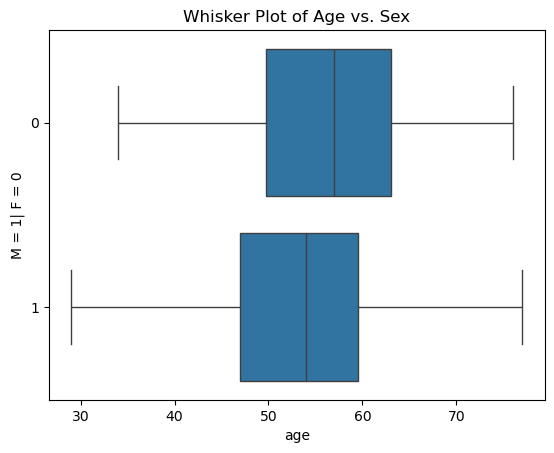

In [9]:
# Creating a box plot
ax = sns.boxplot(x='age', y='sex', data=data_p, orient="h");
ax.set(title='Whisker Plot of Age vs. Sex',
       ylabel="M = 1| F = 0");

 This whisker plot indicates the different quartiles of our dataset for each sex. The mean age for females in our dataset is higher than that of males. Any female subjects below the age of thirty isn't in our sample. On the other hand, male subjects cover a more vast range than female subjects

In [10]:
# Ratio of male and female postive & negative cases
pd.crosstab(data_p['sex'], data_p['target'])

target,0,1
sex,,
0,24,72
1,114,93


## Modelling

In [11]:
# Find the categorical variables
categorical_variables = []

for column in data_p:
    if len(data_p[column].unique()) <= 10:
        categorical_variables.append(column)

# Remove the target variable
categorical_variables.remove('target')

print(categorical_variables)

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']


In [12]:
# Make dummy variables for categorical variables
data = pd.get_dummies(data_p, columns=categorical_variables)

In [13]:
# Split the data
X = data.drop('target', axis=1)
y = data['target']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [15]:
# Non-scaled data
X_train_ws = X_train
X_test_ws = X_test

In [16]:
# Scaled data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [17]:
# Models to use
models = {"Logistic Regression": LogisticRegression(random_state=7, solver='liblinear'),
          "Random Forest": RandomForestClassifier(random_state=7),
          "K-Nearest Neighbors": KNeighborsClassifier(),
          "SVM Kernel": SVC(kernel="rbf", random_state=7),
          "Naive Bayes": GaussianNB()}

# Function to fit and score models
def fit_score(models, X_train, X_test, y_train, y_test):
    """
    1. models: arguments excepts machine learning models
    2. X_train, X_test, y_train, y_test: arguement takes the splitted data
    """
    np.random.seed(7)
    
    # Model scores within the dictionary
    model_scores = {}
    
    # Loop through the models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [18]:
# Model accuracies with scaling
model_scores = fit_score(models=models,
                         X_train=X_train,
                         X_test=X_test,
                         y_train=y_train,
                         y_test=y_test)
model_scores

{'Logistic Regression': 0.7704918032786885,
 'Random Forest': 0.7540983606557377,
 'K-Nearest Neighbors': 0.8032786885245902,
 'SVM Kernel': 0.7540983606557377,
 'Naive Bayes': 0.5081967213114754}

In [19]:
# Model accuracies without scaling
model_scores_ws = fit_score(models=models,
                       X_train=X_train_ws,
                       X_test=X_test_ws,
                       y_train=y_train,
                       y_test=y_test)
model_scores_ws

{'Logistic Regression': 0.7868852459016393,
 'Random Forest': 0.8032786885245902,
 'K-Nearest Neighbors': 0.5573770491803278,
 'SVM Kernel': 0.6229508196721312,
 'Naive Bayes': 0.8032786885245902}

## Model Comparision 

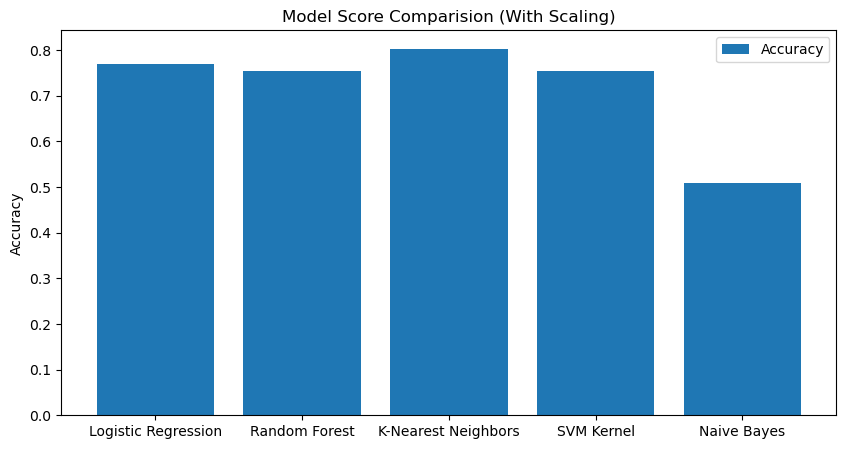

In [20]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(model_scores.keys(), model_scores.values())
ax.legend(['Accuracy'])
ax.set(ylabel="Accuracy",
       title='Model Score Comparision (With Scaling)');

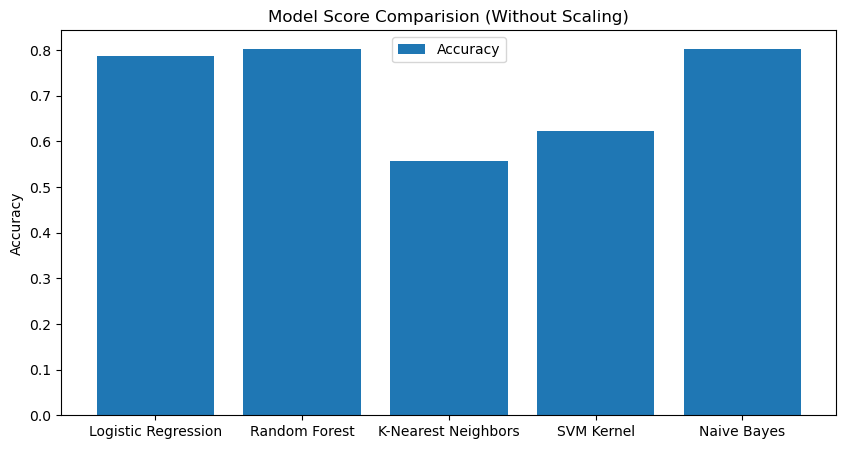

In [21]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(model_scores_ws.keys(), model_scores_ws.values())
ax.legend(['Accuracy'])
ax.set(ylabel="Accuracy",
       title='Model Score Comparision (Without Scaling)');

#### Model performance on scaled data vs non-scaled data:
* KNN Model had a drastic change in accuracy score with scaling. 
> **Conclusion:** Euclidean distance based models require standardisation on data.

* Random Forest and Naive Bayes model performed better without scaling. 
> **Conculsion:** Random Forest and Naive Bayes (Gaussian Naive Bayes performs standardization internally) don't require standardisation on data.

* Logistic Regression performed slightly better without scaling

* SVM scored better with scaling. 
> **Conclusion:** Yes, SVM kernel `(Because Support Vector Machine (SVM) optimization occurs by minimizing the decision vector w, the optimal hyperplane is influenced by the scale of the input features and it’s therefore recommended that data be standardized (mean 0, var 1) prior to SVM model training.)` performs better with standardisation on data.

Other resource(s):
https://www.youtube.com/watch?v=mnKm3YP56PY

Let's look at the following:
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

## Evaluation

### Model 1: KNN

In [22]:
train_scores = {}
test_scores = {}

train_scores_l = []
test_scores_l = []

# Number of neighbors
neighbors = range(1, 50)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through the different number of neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.update({str(i) :knn.score(X_train, y_train)})
    test_scores.update({str(i) :knn.score(X_test, y_test)})
    test_scores_l.append(knn.score(X_test, y_test))
    train_scores_l.append(knn.score(X_train, y_train))

In [23]:
# Maximum train score value
max_train_val = max(train_scores.values())
max_train_val

1.0

In [24]:
# Calculate the mean of training scores
dict_vals = train_scores.values()

vals_list = []

for i in dict_vals:
    vals_list.append(i)
    
arr_1 = np.array(vals_list)
arr_1.mean()

0.874093439028504

In [25]:
# Maximum test score value
max_test_val = max(test_scores.values())
max_test_val

0.819672131147541

In [26]:
# Calculate the mean of test scores
dict_vals_2 = test_scores.values()

vals_list_2 = []

for i in dict_vals_2:
    vals_list_2.append(i)
    
arr_2 = np.array(vals_list)
arr_2.mean()

0.874093439028504

Maximum KNN score on the test data: 81.97%


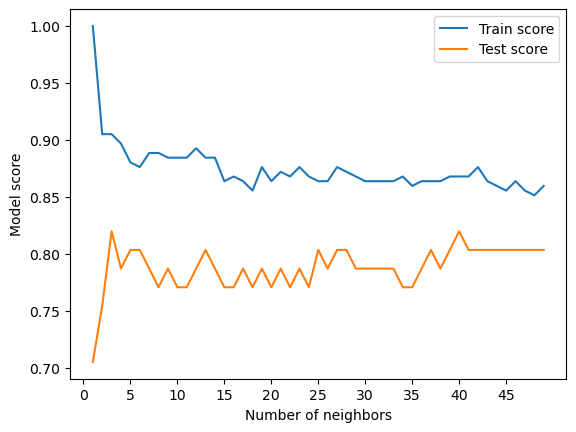

In [27]:
plt.plot(neighbors, train_scores_l, label="Train score")
plt.plot(neighbors, test_scores_l, label="Test score")
plt.xticks(np.arange(0, 50, 5))
plt.xlabel("Number of neighbors")
plt.ylabel('Model score')
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores_l)*100:.2f}%");

In [28]:
# Find number of neighbors with the highest accuracy
n_trees = max_test_val

# Empty list to store the best number of neighbors
max_key = []
for key, val in test_scores.items(): 
    if val == n_trees:
        print(key)
        max_key.append(key)

3
40


In [29]:
# Scale X for cross-validation
X_scaled = sc.fit_transform(X)

In [30]:
# Take the best number of neighbors
best_num = int(max_key[1])

In [31]:
# Initiate KNN instance
knn_cv = KNeighborsClassifier(n_neighbors=best_num)

In [32]:
# Cross-validated accuracy
cv_knn = cross_val_score(knn_cv, 
                         X_scaled, 
                         y, 
                         cv=5, 
                         scoring='accuracy') 

In [33]:
cv_knn

array([0.81967213, 0.90163934, 0.80327869, 0.81666667, 0.85      ])

In [34]:
# Average of cross-validated scores
cv_knn.mean()

0.8382513661202184

In [35]:
# Standard deviation of cross-validated scores
cv_knn.std()

0.03518591073671226

In [36]:
# Setting up parameters for Randomized Search CV and Grid Search CV
KNN_params = {'n_neighbors': [3,40],
             'p': [1, 2, 5]}

In [37]:
# Perform Randomized Search on KNN model
rs_KNN = RandomizedSearchCV(estimator=KNeighborsClassifier(),
                     param_distributions=KNN_params,
                     cv=5,
                     verbose=True,
                     n_iter=12)

rs_KNN.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


e:\tf_env\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=12. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=12,
                   param_distributions={'n_neighbors': [3, 40], 'p': [1, 2, 5]},
                   verbose=True)

In [38]:
rs_KNN.best_params_

{'p': 2, 'n_neighbors': 40}

In [39]:
rs_KNN.score(X_train, y_train)

0.8677685950413223

In [40]:
rs_KNN.score(X_test, y_test)

0.819672131147541

In [41]:
# Final model
clf_knn = KNeighborsClassifier(n_neighbors=best_num)
clf_knn.fit(X_train, y_train)
# Model score on test data
clf_knn.score(X_test, y_test)

0.819672131147541

In [42]:
# Model score on train data
clf_knn.score(X_train, y_train)

0.8677685950413223

In [43]:
y_preds_knn = clf_knn.predict(X_test)

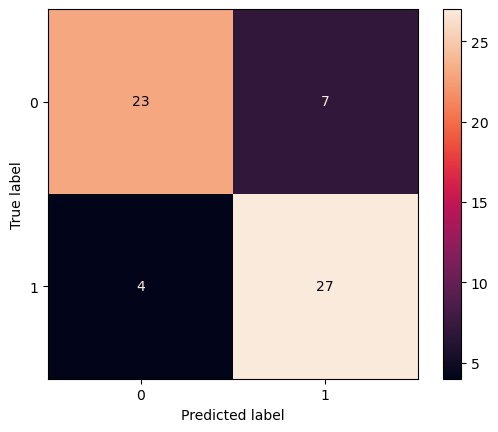

In [44]:
# Confusion matrix
knn_conf_mat = confusion_matrix(y_test, y_preds_knn)
disp = ConfusionMatrixDisplay(knn_conf_mat)
disp.plot(cmap="rocket")
plt.show()

In [45]:
# Classification report
print(classification_report(y_test, y_preds_knn))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81        30
           1       0.79      0.87      0.83        31

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



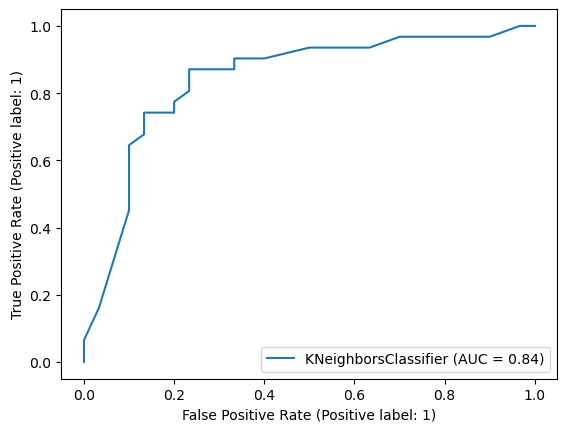

In [46]:
## Plot ROC curve and calculate AUC metric
RocCurveDisplay.from_estimator(clf_knn, X_test, y_test)
plt.show()

### Model 2: Logistic Regression
Resources: https://www.kaggle.com/joparga3/2-tuning-parameters-for-logistic-regression
* Solver (According to Scikit-Learn): For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.

In [47]:
# Logistic Regression grid for hyperparameter tuning
log_reg_grid = {"C": np.logspace(-4, 4, 30),
               'solver': ['liblinear']}

In [48]:
# Perform RandomizedSearchCV on logistic regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(random_state=7),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=7),
                   n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [49]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.1082636733874054}

In [50]:
rs_log_reg.score(X_test, y_test)

0.8032786885245902

In [51]:
y_preds_rslg = rs_log_reg.predict(X_test)

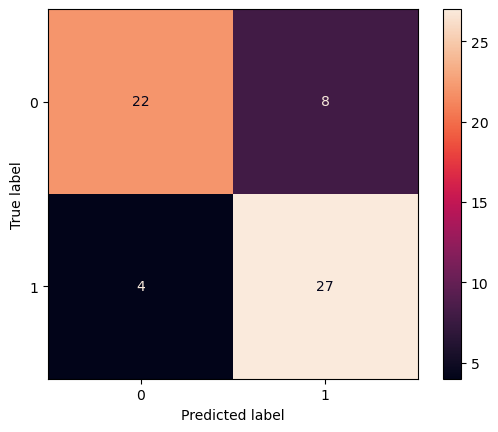

In [52]:
lg_conf_mat = confusion_matrix(y_test, y_preds_rslg)
disp_two = ConfusionMatrixDisplay(lg_conf_mat)
disp_two.plot(cmap="rocket")
plt.show()

In [53]:
# Perform GridSearchCV on logistic Regression
gs_log_reg = GridSearchCV(LogisticRegression(random_state=7),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=7),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [54]:
gs_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [55]:
gs_log_reg.score(X_test, y_test)

0.8032786885245902

In [56]:
cv_log_reg = cross_val_score(LogisticRegression(C=0.1082636733874054,
                                               solver='liblinear'),
                            X_scaled,
                            y,
                            cv=5,
                            scoring='accuracy')

In [57]:
cv_log_reg

array([0.86885246, 0.8852459 , 0.80327869, 0.85      , 0.8       ])

In [58]:
cv_log_reg.mean()

0.8414754098360657

In [59]:
cv_log_reg.std() * 100

3.4401239954403215

In [60]:
# Final model
clf_log = LogisticRegression(C=0.1082636733874054,
                            solver='liblinear')

clf_log.fit(X_train, y_train)

LogisticRegression(C=0.1082636733874054, solver='liblinear')

In [61]:
clf_log.score(X_test, y_test)

0.8032786885245902

In [62]:
y_preds_clf_log = clf_log.predict(X_test)

In [63]:
print(classification_report(y_test, y_preds_clf_log))

              precision    recall  f1-score   support

           0       0.85      0.73      0.79        30
           1       0.77      0.87      0.82        31

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



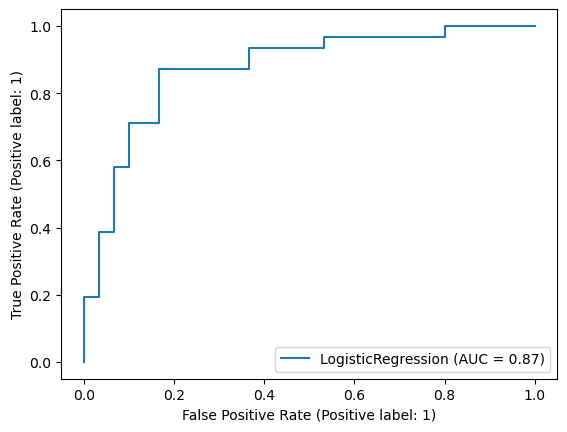

In [64]:
# Plot ROC Curve
RocCurveDisplay.from_estimator(clf_log, X_test, y_test)
plt.show()

### Model 3: SVM Kernel

In [65]:
# GridSearch
svm_grid = {"C": np.logspace(-1, 2, 20),
            "gamma": np.logspace(-4, 2, 20)}

In [66]:
gs_svm = GridSearchCV(SVC(kernel='rbf', random_state=7),
                      param_grid=svm_grid,
                      cv=5,
                      verbose=True)

gs_svm.fit(X_train, y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


GridSearchCV(cv=5, estimator=SVC(random_state=7),
             param_grid={'C': array([  0.1       ,   0.14384499,   0.20691381,   0.29763514,
         0.42813324,   0.61584821,   0.88586679,   1.27427499,
         1.83298071,   2.6366509 ,   3.79269019,   5.45559478,
         7.8475997 ,  11.28837892,  16.23776739,  23.35721469,
        33.59818286,  48.32930239,  69.51927962, 100.        ]),
                         'gamma': array([1.00000000e-04, 2.06913808e-04, 4.28133240e-04, 8.85866790e-04,
       1.83298071e-03, 3.79269019e-03, 7.84759970e-03, 1.62377674e-02,
       3.35981829e-02, 6.95192796e-02, 1.43844989e-01, 2.97635144e-01,
       6.15848211e-01, 1.27427499e+00, 2.63665090e+00, 5.45559478e+00,
       1.12883789e+01, 2.33572147e+01, 4.83293024e+01, 1.00000000e+02])},
             verbose=True)

In [67]:
svm_params = gs_svm.best_params_

In [68]:
c_param = svm_params['C']
g_param = svm_params['gamma']

In [69]:
gs_svm.score(X_test, y_test)

0.8032786885245902

In [70]:
svm_cv = cross_val_score(SVC(kernel='rbf', random_state=7, C=c_param, gamma=g_param),
                         X_scaled,
                         y,
                         cv=5,
                         scoring='accuracy')

In [71]:
svm_cv.mean()

0.8413661202185793

In [72]:
svm_cv.std()

0.04344781217933294

In [73]:
# Final model
svm_clf = SVC(kernel='rbf', random_state=7, C=c_param, gamma=g_param)
svm_clf.fit(X_train, y_train)

SVC(C=0.20691380811147897, gamma=0.00379269019073225, random_state=7)

In [74]:
svm_preds = svm_clf.predict(X_test)

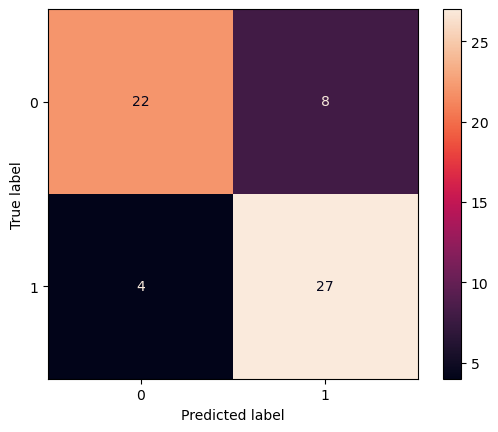

In [75]:
svm_conf_mat = confusion_matrix(y_test, svm_preds)
disp_three = ConfusionMatrixDisplay(svm_conf_mat)
disp_three.plot(cmap="rocket")
plt.show()

In [76]:
svm_clf.score(X_test, y_test)

0.8032786885245902

### Model 4: Random Forest

In [77]:
# Dictionary of number of trees with its accuracy score
tas = {}

for i in range(1, 2000, 100):
    rf_clf = RandomForestClassifier(n_estimators=i)
    rf_clf.fit(X_train_ws, y_train)
    tas.update({str(i): rf_clf.score(X_test_ws, y_test)})

In [78]:
max(tas.values())

0.8032786885245902

In [79]:
# Grid search for other parameters
rf_grid = {"max_depth": [5, 8, 15, 25, 30],
           "min_samples_split": [2, 5, 10, 15, 100],
           "min_samples_leaf": [2, 5, 10],
           "n_estimators": [100, 150, 200]} 

In [80]:
gs_rf = GridSearchCV(RandomForestClassifier(),
                     param_grid = rf_grid,
                     cv = 5,
                     verbose = True)

gs_rf.fit(X_train_ws, y_train)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 8, 15, 25, 30],
                         'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [2, 5, 10, 15, 100],
                         'n_estimators': [100, 150, 200]},
             verbose=True)

In [81]:
gs_rf.score(X_test_ws, y_test)

0.7704918032786885

In [82]:
rf_params = gs_rf.best_params_

In [83]:
rf_params

{'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 15,
 'n_estimators': 150}

In [84]:
rf_cv = cross_val_score(RandomForestClassifier(random_state=7, max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators= 150),
                        X,
                        y,
                        cv=5,
                        scoring='accuracy')

In [85]:
rf_cv.mean()

0.8381967213114756

In [86]:
rf_cv.std() * 100

4.849073303161097

In [87]:
# Default model cross-validation
rf_cv2 = cross_val_score(RandomForestClassifier(random_state=7),
                        X,
                        y,
                        cv=5,
                        scoring='accuracy')

In [88]:
rf_cv2.mean()

0.8414754098360657

In [89]:
rf_cv2.std() * 100

3.7395738784332275

In [90]:
# Final model
rf_clf = RandomForestClassifier(random_state=7, n_estimators=100)
rf_clf.fit(X_train_ws, y_train)

RandomForestClassifier(random_state=7)

In [91]:
rf_clf.score(X_test_ws, y_test)

0.8032786885245902

In [92]:
rf_clf.score(X_train_ws, y_train)

1.0

In [93]:
rf_y_preds = rf_clf.predict(X_test_ws)

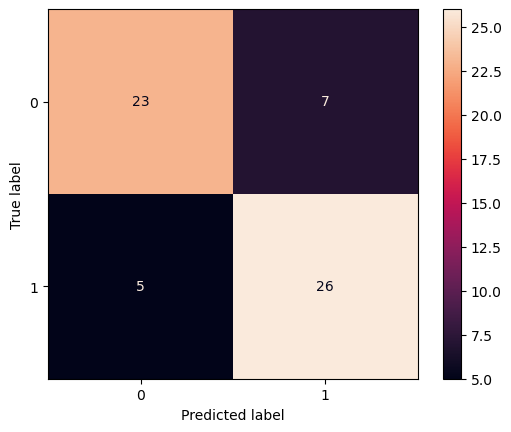

In [94]:
rf_conf_mat = confusion_matrix(y_test, rf_y_preds)
disp_four = ConfusionMatrixDisplay(rf_conf_mat)
disp_four.plot(cmap="rocket")
plt.show()

e:\tf_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


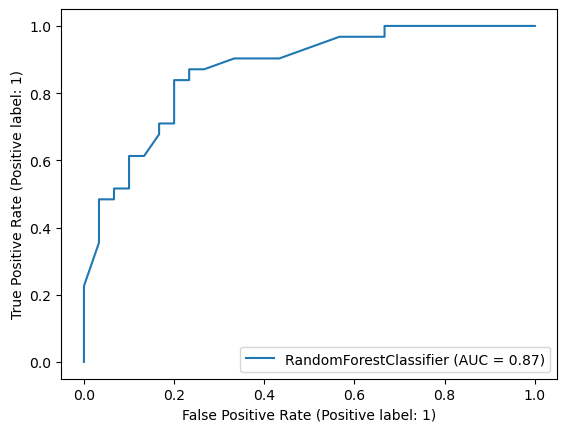

In [95]:
RocCurveDisplay.from_estimator(rf_clf, X_test, y_test)
plt.show();

In [96]:
print(classification_report(y_test, rf_y_preds))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79        30
           1       0.79      0.84      0.81        31

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [97]:
# Final scores with hyperparameter tuning
f_scores = {"KNN:": rs_KNN.score(X_test, y_test),
            "Logistic Regression:": rs_log_reg.score(X_test, y_test),
            "SVM Kernel:": gs_svm.score(X_test, y_test),
            "Random Forest:": rf_clf.score(X_test_ws, y_test)} 

In [98]:
for i in f_scores:
    print(i, f_scores[i])

KNN: 0.819672131147541
Logistic Regression: 0.8032786885245902
SVM Kernel: 0.8032786885245902
Random Forest: 0.8032786885245902
